# Fraud Detection Binary Classification

### [dataset](https://www.kaggle.com/datasets/sameerk2004/fraud-detection-dataset)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

License: No license information was provided.

## **Executive Summary**

### **Objective**

This report presents an analysis of demographic and occupational data focusing on income distribution across professions. Using visualizations and a basic binary classification model, we aimed to explore any patterns or associations within this dataset.

### **Data Insights**

**1. Income Distribution Analysis**
- **Income Distribution:** The histogram with KDE line shows a marginal distribution of income ranging from 0 to 100,000. This distribution is relatively uniform, with consistent counts across income intervals. The smooth, flat KDE line reflects this uniformity, indicating no significant clustering or peaks, which suggests that income is evenly spread throughout the dataset.

**2. Profession Distribution Analysis**
- **Profession Counts:** The bar chart illustrates similar counts across the professions of doctors, lawyers, and engineers, with a slightly higher count for doctors, followed by lawyers and then engineers. This balance indicates a well-represented sample across these professions, allowing for fair comparison of characteristics within these groups.

**3. Income by Profession Analysis**
- **Income Comparison Across Professions:** Box plots show similar median income levels across doctors, lawyers, and engineers, with wide interquartile ranges, suggesting variability within each profession but comparable medians. The error bar plot further supports this, with mean incomes closely aligned and overlapping confidence intervals, suggesting minimal differences in average income between professions.

### **Model Development and Selection**

**Model Evaluation**
- **Model Performance:** The selected model achieved an accuracy of 51.35% and an ROC AUC of 51.03%, barely above random guessing, indicating limited predictive utility. The model included six coefficients, but only one—specifically the profession category "Engineer"—was statistically significant, with a coefficient of -0.1740 (p-value = 0.0075), suggesting a slight negative association with the target variable. The use of higher-order terms for income did not yield significant results, underscoring the model's lack of predictive strength.

### **Implications**

The model’s near-random performance underscores its limited practical application, as it fails to provide meaningful predictions or insights. The analysis of income distribution by profession suggests minimal variation across professional categories, and the model’s lack of robust predictive power further confirms that these features do not strongly differentiate the target outcome.

### **Recommendations and Next Steps**

1. **Improvement of Model Features:** Consider including additional relevant demographic or lifestyle variables to enhance predictive power.
2. **Alternative Modeling Approaches:** Explore other algorithms that may be more suited to uncovering subtle relationships within this dataset.
3. **Avoid Practical Application:** Due to its low accuracy and ROC AUC, this model should not be used for any decision-making processes.

### **Conclusion**

This analysis indicates that the current dataset lacks substantial variation in income distribution across the professions of doctors, lawyers, and engineers. The selected model’s low accuracy and ROC AUC further confirm that it is unsuitable for predictive applications. Future analyses with additional features and more refined modeling techniques are recommended. **This model should never be used in production due to its poor predictive performance.**

## Import Main Modules & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import itertools

In [4]:
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv('data2.csv')

## Perform Basic Analysis

In [6]:
df.shape

(10000, 6)

In [7]:
df.dtypes

Profession            object
Income                 int64
Credit_card_number     int64
Expiry                object
Security_code          int64
Fraud                  int64
dtype: object

In [8]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

Profession
DOCTOR      3379
LAWYER      3357
ENGINEER    3264
Name: count, dtype: int64

Income
21212    4
48497    3
99555    3
29063    3
63989    3
        ..
70496    1
70397    1
19876    1
24324    1
94529    1
Name: count, Length: 9499, dtype: int64

Credit_card_number
3515418493460774    1
5561163042885752    1
5342120228524957    1
30211726221028      1
6011001678278898    1
                   ..
180069799453110     1
6558311033569777    1
6011792095647646    1
213148105275176     1
4906715586330631    1
Name: count, Length: 10000, dtype: int64

Expiry
01/30    111
03/26    107
10/25    106
12/24    103
05/34    102
        ... 
09/27     65
11/24     65
02/27     63
02/29     54
11/34     21
Name: count, Length: 121, dtype: int64

Security_code
259     20
846     19
421     19
506     18
930     17
        ..
8548     1
9546     1
4057     1
3371     1
5898     1
Name: count, Length: 1699, dtype: int64

Fraud
1    5016
0    4984
Name: count, dtype: int64



In [9]:
df.nunique()

Profession                3
Income                 9499
Credit_card_number    10000
Expiry                  121
Security_code          1699
Fraud                     2
dtype: int64

## Drop Unused Variables

In [10]:
df.drop(['Credit_card_number',
         'Expiry',
         'Security_code'], 
        axis=1, 
        inplace=True)

## Verify/Handle Missing Values 

In [11]:
df.isna().sum()

Profession    0
Income        0
Fraud         0
dtype: int64

## Create Input & Output Vars

In [15]:
df.dtypes

Profession    object
Income         int64
Fraud          int64
dtype: object

In [18]:
cat_input_vars = ['Profession']

In [19]:
cont_input_vars = ['Income']

In [20]:
target = 'Fraud'

## Exploratory Data Analysis

### Marginal Distributions Continuous Variables: Histograms and Density Plots
* The histogram with KDE line displays the marginal distribution of income across a range from 0 to 100,000. The distribution appears relatively uniform, as the counts remain fairly consistent across income intervals, with each bar representing approximately the same number of observations. This suggests that income is evenly spread throughout the dataset, without any significant clustering at particular income levels. The KDE line further supports this, showing a smooth, flat curve that mirrors the histogram’s uniformity, with slight fluctuations but no major peaks or dips.

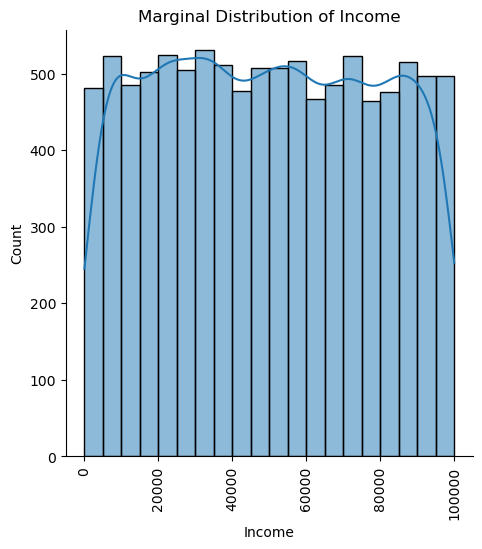

In [25]:
for cont in cont_input_vars:
    sns.displot(data=df,
                x=cont,
                kind='hist',
                bins=20,
                kde=True)
    plt.xticks(rotation=90)
    plt.title(f'Marginal Distribution of {cont}')
    plt.show()

### Marginal Distributions Categorical Variables: Bar Charts
* The bar chart illustrates the distribution of professions within the dataset, specifically for doctors, lawyers, and engineers. Each profession has a similar count, with doctors slightly outnumbering the other two groups, followed closely by lawyers and then engineers. This balance suggests a well-represented sample across these professions, with no single profession dominating the dataset. The near-equal representation among these professions provides a basis for potentially comparing other characteristics across these groups.

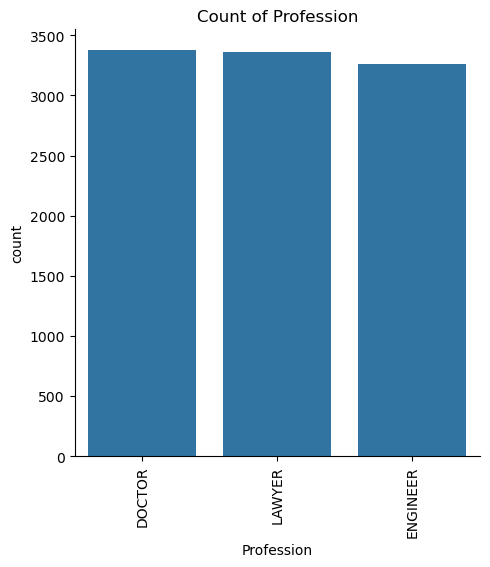

In [26]:
for cat in cat_input_vars:
    sns.catplot(data=df,
                x=cat,
                kind='count',
                legend=False)
    plt.xticks(rotation=90)
    plt.title(f'Count of {cat}')
    plt.show()

### Categorical-to-Continuous Relationships or Conditional Distributions: Box Plots, Violin Plots and Point Plots
* The analysis of income distribution across professions, including doctors, lawyers, and engineers, reveals a relatively even income range with no pronounced disparities between professions. The box plot shows similar median income levels for each profession, with a wide interquartile range, indicating that income within each field varies but remains generally comparable across professions. The error bar plot further emphasizes this uniformity, with mean income values closely aligned and overlapping confidence intervals, suggesting that the average income does not significantly differ between these professional categories. Overall, these visualizations imply that income levels are quite balanced among doctors, lawyers, and engineers in this dataset.

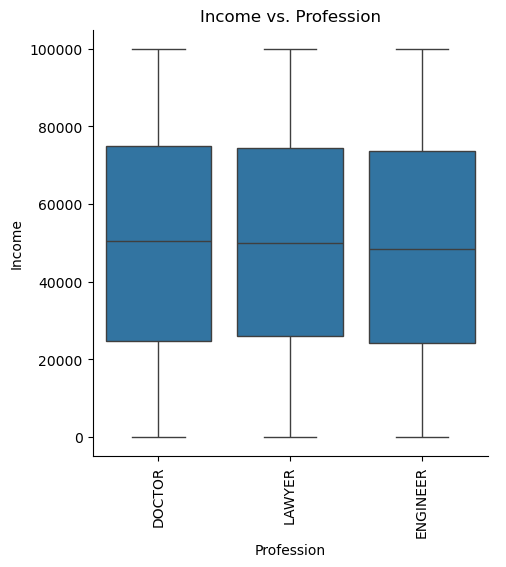

In [29]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var, 
                    y=cont_input_var, 
                    kind='box')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

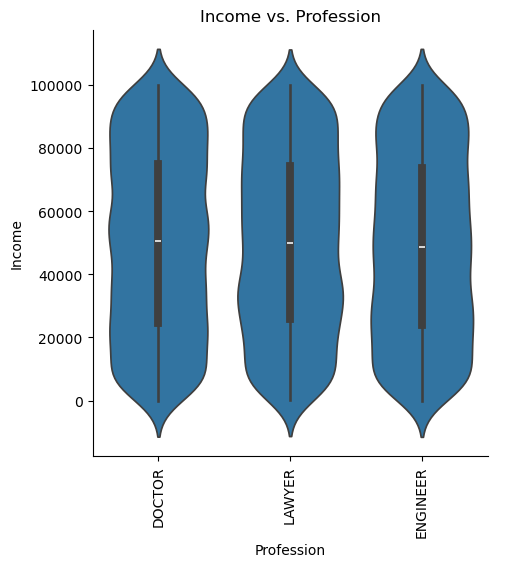

In [30]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var, 
                    y=cont_input_var, 
                    kind='violin')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

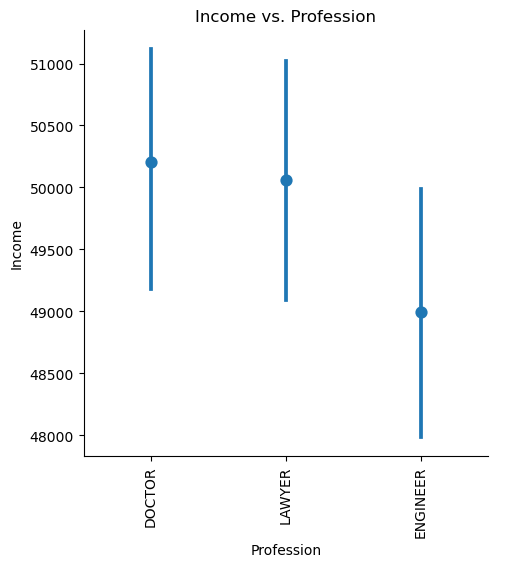

In [31]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var, 
                    y=cont_input_var, 
                    kind='point', 
                    linestyles='')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

## Binary Classification Model

In [35]:
df.dtypes

Profession    object
Income         int64
Fraud          int64
dtype: object

### Formulas

#### Formula 0: Additive Terms Only

In [40]:
formula_additive = """
    Fraud ~ 
    C(Profession) + 
    Income
"""

#### Formula 1: Additive and Interaction Terms

In [41]:
formula_additive_and_interactive = """
    Fraud ~ 
    C(Profession) * 
    Income
"""

#### Formula 2: Quadratic

In [42]:
formula_quadratic = """
    Fraud ~ 
    C(Profession) * 
    I(Income**2)
"""

#### Formula 3: Cubic

In [43]:
formula_cubic = """
    Fraud ~ 
    C(Profession) * 
    I(Income**3)
"""

#### Formula 4: Quartic

In [44]:
formula_quartic = """
    Fraud ~ 
    C(Profession) * 
    I(Income**4)
"""

#### Combined Formulas

In [45]:
formulas = [formula_additive,
            formula_additive_and_interactive,
            formula_quadratic,
            formula_cubic,
            formula_quartic]

### Apply 5-Fold Cross-Validation

In [46]:
from sklearn.model_selection import StratifiedKFold

In [47]:
kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=101)

### Fit the Logistic Regression Models w/ Statsmodels

In [48]:
input_names = df.drop(columns=[target]).\
                      copy().\
                      columns.\
                      to_list()

In [49]:
output_name = target

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
def my_coefplot(model, figsize_default=(10, 4), figsize_expansion_factor=0.5, max_default_vars=10):
    """
    Function that plots a coefficient plot with error bars for a given statistical model
    and prints out which variables are statistically significant and whether they are positive or negative.
    The graph height dynamically adjusts based on the number of variables.

    Params:
        model: object
        figsize_default: tuple, optional
        figsize_expansion_factor: float, optional
        max_default_vars: int, optional
    """
    # cap the standard errors (bse) to avoid overly large error bars, upper bound set to 2
    capped_bse = model.bse.clip(upper=2)
    
    # calculate the minimum and maximum coefficient values adjusted by the standard errors
    coef_min = (model.params - 2 * capped_bse).min()
    coef_max = (model.params + 2 * capped_bse).max()
    
    # define buffer space for the x-axis limits
    buffer_space = 0.5
    xlim_min = coef_min - buffer_space
    xlim_max = coef_max + buffer_space
    
    # dynamically calculate figure height based on the number of variables
    num_vars = len(model.params)
    if num_vars > max_default_vars:
        height = figsize_default[1] + figsize_expansion_factor * (num_vars - max_default_vars)
    else:
        height = figsize_default[1]
    
    # create the plot
    fig, ax = plt.subplots(figsize=(figsize_default[0], height))
    
    # identify statistically significant and non-significant variables based on p-values
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    not_significant_vars = model.pvalues[model.pvalues >= 0.05].index
    
    # plot non-significant variables with grey error bars
    ax.errorbar(y=not_significant_vars,
                x=model.params[not_significant_vars],
                xerr=2 * capped_bse[not_significant_vars],
                fmt='o', 
                color='grey', 
                ecolor='grey', 
                elinewidth=2, 
                ms=10,
                label='not significant')
    
    # plot significant variables with red error bars
    ax.errorbar(y=significant_vars,
                x=model.params[significant_vars],
                xerr=2 * capped_bse[significant_vars],
                fmt='o', 
                color='red', 
                ecolor='red', 
                elinewidth=2, 
                ms=10,
                label='significant (p < 0.05)')
    
    # add a vertical line at 0 to visually separate positive and negative coefficients
    ax.axvline(x=0, linestyle='--', linewidth=2.5, color='grey')
    
    # adjust the x-axis limits to add some buffer space on either side
    ax.set_xlim(min(-0.5, coef_min - 0.2), max(0.5, coef_max + 0.2))
    ax.set_xlabel('coefficient value')
    
    # add legend to distinguish between significant and non-significant variables
    ax.legend()
    
    # show the plot
    plt.show()
    
    # print the summary of statistically significant variables
    print('\n--- statistically significant variables ---')
    
    # check if there are any significant variables, if not, print a message
    if significant_vars.empty:
        print('No statistically significant variables found.')
    else:
        # for each significant variable, print its coefficient, standard error, p-value, and direction
        for var in significant_vars:
            coef_value = model.params[var]
            std_err = model.bse[var]
            p_val = model.pvalues[var]
            direction = 'positive' if coef_value > 0 else 'negative'
            print(f'variable: {var}, coefficient: {coef_value:.4f}, std err: {std_err:.4f}, p-value: {p_val:.4f}, direction: {direction}')

In [53]:
def train_and_test_logistic_with_cv(model, formula, df, x_names, y_name, cv, threshold=0.5, use_scaler=True):
    """
    Function to train and test a logistic binary classification model with Cross-Validation,
    including accuracy and ROC AUC score calculations.

    Params:
        model: object
        formula: str
        df: object
        x_names: list
        y_name: str
        cv: object
        threshold: float, optional
        use_scaler: bool, optional

    Returns:
        object
    """
    # separate the inputs and output
    input_df = df.loc[:, x_names].copy()
    
    # initialize the performance metric storage lists
    train_res = []
    test_res = []
    train_auc_scores = []
    test_auc_scores = []
    
    # split the data and iterate over the folds
    for train_id, test_id in cv.split(input_df.to_numpy(), df[y_name].to_numpy()):
        
        # subset the training and test splits within each fold
        train_data = df.iloc[train_id, :].copy()
        test_data = df.iloc[test_id, :].copy()

        # if the use_scaler flag is set, standardize the numeric features within each fold
        if use_scaler:
            scaler = StandardScaler()
            
            # identify numeric columns to scale, excluding the target variable
            columns_to_scale = train_data.select_dtypes(include=[np.number]).columns.tolist()
            columns_to_scale = [col for col in columns_to_scale if col != y_name]
            
            # fit scaler on training data
            scaler.fit(train_data[columns_to_scale])
            
            # transform training and test data
            train_data[columns_to_scale] = scaler.transform(train_data[columns_to_scale])
            test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])
        
        # fit the model on the training data within the current fold
        a_model = smf.logit(formula=formula, data=train_data).fit()
        
        # predict the training within each fold
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_model.predict(train_data)
        train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0)
        
        # predict the testing within each fold
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_model.predict(test_data)
        test_copy['pred_class'] = np.where(test_copy.pred_probability > threshold, 1, 0)
        
        # calculate the performance metric (accuracy) on the training set within the fold
        train_res.append(np.mean(train_copy[y_name] == train_copy.pred_class))
        
        # calculate the performance metric (accuracy) on the testing set within the fold
        test_res.append(np.mean(test_copy[y_name] == test_copy.pred_class))

        # calculate the roc_auc_score for the training set
        train_auc_scores.append(roc_auc_score(train_copy[y_name], train_copy['pred_probability']))
        
        # calculate the roc_auc_score for the testing_set
        test_auc_scores.append(roc_auc_score(test_copy[y_name], test_copy['pred_probability']))
    
    # book keeping to store the results (accuracy)
    train_df = pd.DataFrame({'accuracy': train_res, 'roc_auc': train_auc_scores})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    test_df = pd.DataFrame({'accuracy': test_res, 'roc_auc': test_auc_scores})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1
    
    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # add information about the model
    res_df['model'] = model
    res_df['formula'] = formula
    res_df['num_coefs'] = len(a_model.params)
    res_df['threshold'] = threshold

    # return the results DataFrame
    return res_df

### Test Models

In [54]:
import os

In [55]:
import contextlib

In [56]:
res_list = []
error_log = []

with contextlib.redirect_stdout(open(os.devnull, 'w')), contextlib.redirect_stderr(open(os.devnull, 'w')):
    for model in range(len(formulas)):
        try:
            res_list.append(train_and_test_logistic_with_cv(model,
                                                            formula=formulas[model],
                                                            df=df,
                                                            x_names=input_names,
                                                            y_name=output_name,
                                                            cv=kf))
        except Exception as e:
            error_log.append(f'Formula ID {model} failed: {str(e)}')

In [57]:
cv_results = pd.concat(res_list, ignore_index=True)

In [58]:
cv_results

,accuracy,roc_auc,from_set,fold_id,model,formula,num_coefs,threshold
0,0.513875,0.519780,training,1,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
1,0.510500,0.514585,training,2,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
2,0.515750,0.521852,training,3,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
3,0.515500,0.515066,training,4,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
4,0.516625,0.520080,training,5,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
5,0.518000,0.512652,testing,1,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
6,0.508500,0.519114,testing,2,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
7,0.500000,0.501801,testing,3,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
8,0.515000,0.529791,testing,4,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5
9,0.507500,0.509905,testing,5,0,\n Fraud ~ \n C(Profession) + \n Inco...,4,0.5


### Review Model Results - Average of Folds

#### All Models w/ Highest Accuracy on the Testing Dataset

In [59]:
cv_results.loc[(cv_results['from_set'] == 'testing') & 
               (cv_results['accuracy'] < 1.0) & 
               (cv_results['roc_auc'] < 1.0)].\
           groupby('model').\
           aggregate({'accuracy': 'mean', 
                      'roc_auc': 'mean', 
                      'num_coefs': 'first'}).\
           reset_index().\
           sort_values(by='accuracy', ascending=False)

,model,accuracy,roc_auc,num_coefs
3,3,0.5135,0.510261,6
1,1,0.5132,0.511536,6
4,4,0.5124,0.516117,6
2,2,0.5099,0.513890,6
0,0,0.5098,0.514653,4


### Model Selection
* The selected model, with an accuracy of 51.35% and an ROC AUC of 51.03%, performs just slightly above random guessing, suggesting limited practical utility for predictive purposes. The model includes six coefficients, but only one variable, the profession category “Engineer,” is statistically significant. This variable has a coefficient of -0.1740 (p-value = 0.0075), indicating a small negative association with the target variable. However, the effect size and overall model performance remain weak, as reflected in the near-random accuracy and ROC AUC values. The inclusion of higher-order terms of income (e.g., cubic transformations) did not yield statistically significant results, further indicating that this model lacks predictive robustness. In practical applications, this model would be unreliable for actionable insights or decision-making due to its low discriminative power.

In [60]:
best_model = smf.logit(formula=formulas[3], 
                       data=df_copy).fit()

Optimization terminated successfully.
         Current function value: 0.692566
         Iterations 3


In [61]:
best_model.params

Intercept                                   7.043557e-02
C(Profession)[T.ENGINEER]                  -1.739608e-01
C(Profession)[T.LAWYER]                    -8.981707e-02
I(Income ** 3)                              4.694737e-17
C(Profession)[T.ENGINEER]:I(Income ** 3)    9.716693e-17
C(Profession)[T.LAWYER]:I(Income ** 3)      4.307758e-17
dtype: float64

In [62]:
best_model.pvalues < 0.05

Intercept                                   False
C(Profession)[T.ENGINEER]                    True
C(Profession)[T.LAWYER]                     False
I(Income ** 3)                              False
C(Profession)[T.ENGINEER]:I(Income ** 3)    False
C(Profession)[T.LAWYER]:I(Income ** 3)      False
dtype: bool

In [63]:
best_model.params[best_model.pvalues < 0.05].sort_values(ascending=False)

C(Profession)[T.ENGINEER]   -0.173961
dtype: float64

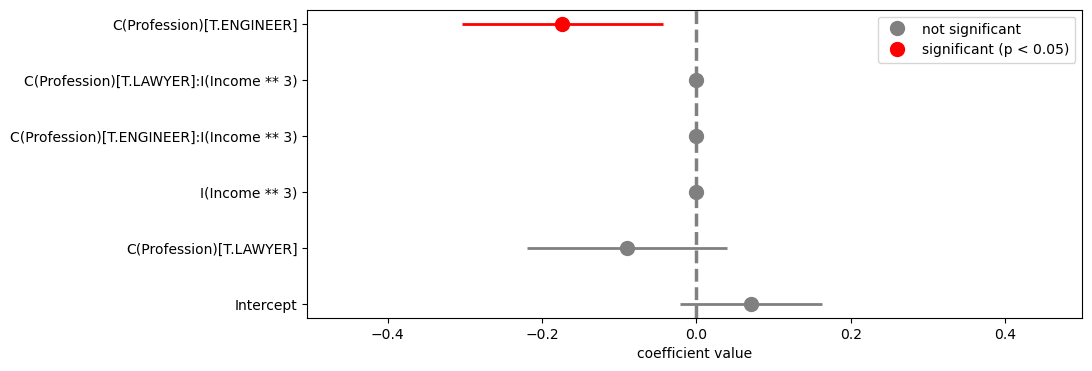


--- statistically significant variables ---
variable: C(Profession)[T.ENGINEER], coefficient: -0.1740, std err: 0.0651, p-value: 0.0075, direction: negative


In [64]:
my_coefplot(best_model)

### Save Model - Usage in Inference Application

In [66]:
import pickle

In [67]:
with open('fraud_detection_logit_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### Load Model - Usage in Inference Application

In [68]:
with open('fraud_detection_logit_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### Perform Inference - Validate Production Model

In [75]:
sample_data = pd.DataFrame({
    'Profession': ['DOCTOR'],
    'Income': [80000]
})

In [76]:
loaded_model.predict(sample_data)

0    0.523601
dtype: float64